# Fitting a function to data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit


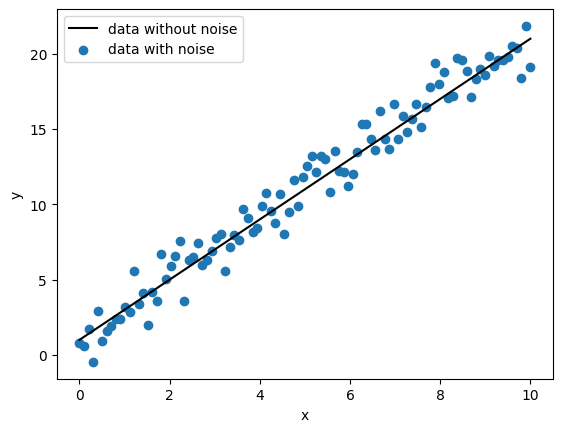

In [6]:
# make the random numbers predictable
np.random.seed(46)
# define the function to fit
def func(x, a, b):
    return a * x + b

# generate data with noise
x = np.linspace(0, 10, 100)
a = 2
b = 1
y = func(x,a,b) 
# generate data with noise, noise should be random noise with standard deviation of 5 % of the mean y- value
y_noise = 1* np.random.normal(size=x.size)
noise_level = 5 # in percent
# noise is calculated as a percentage of the max y-value
noise1 = np.random.normal(loc=0.0, scale= y.max()/100* noise_level, size=len(x)) # numpy.random
noise_ss = ss.norm.rvs(loc=0.0, scale = y.max()/100* noise_level, size=len(x)) # scipy.stats
y_exp = y + noise1
y_exp_ss = y + noise_ss
# plot data

plt.plot(x, y, label='data without noise', color = 'black')
plt.scatter(x, y_exp, label='data with noise')
# plt.scatter(x, y_exp_ss, label='data with noise scipy.stats')

# label the axes
plt.xlabel('x')
plt.ylabel('y')
# show the plot
plt.legend()
plt.show()

a =, 2.02 +/- 0.04
b =, 1.03 +/- 0.22


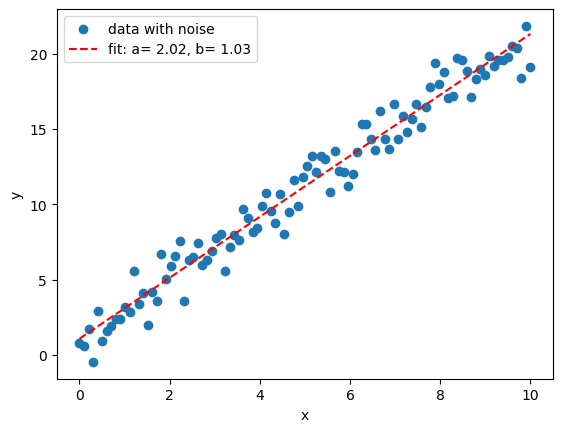

In [7]:
# fit the function
a_init = 1
b_init = 1
popt, pcov = curve_fit(func, x, y_exp, p0=(a_init, b_init))
# print the fit parameters
print(f'a =, {popt[0]:.2f} +/- {np.sqrt(pcov[0,0]):.2f}')
print(f'b =, {popt[1]:.2f} +/- {np.sqrt(pcov[1,1]):.2f}')

# plot the fit
# plt.scatter(x, y, label='data')
plt.scatter(x, y_exp, label='data with noise')
# plt.scatter(x, y_exp_ss, label='data with noise scipy.stats')
# include the the error of the fit parameters in the legend
plt.plot(x, func(x, popt[0]+pcov[0,0], popt[1]+pcov[1,1]), 'r--', label='fit: a=%5.2f, b=%5.2f' % tuple(popt+pcov[0,0]))
# label the axes
plt.xlabel('x')
plt.ylabel('y')
# show the plot
plt.legend()
plt.show()

## Watermark

In [8]:
%load_ext watermark
%watermark -v
%watermark --conda
%watermark --iversions
%watermark -v -m -p numpy,scipy,matplotlib,pandas,watermark
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.7.0

conda environment: python3915

pandas    : 1.5.2
numpy     : 1.23.5
matplotlib: 3.6.2
scipy     : 1.8.1

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.7.0

numpy     : 1.23.5
scipy     : 1.8.1
matplotlib: 3.6.2
pandas    : 1.5.2
watermark : 2.3.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Sun Mar 26 2023 16:41:00Mitteleuropäische Sommerzeit

